In [186]:
import pandas as pd

In [187]:
#Loading dataset
df = pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [188]:
#Checking the shape of the dataset
df.shape

(5572, 2)

In [189]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [190]:
#Using LabelEncoder to convert the 'Category' column to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [191]:
#Checking for duplicated values
df.duplicated().sum()

np.int64(415)

In [192]:
#Removing duplicate values
df.drop_duplicates(keep="first",inplace=True)
df.shape

(5157, 2)

Performing EDA

In [193]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
df["Category"].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

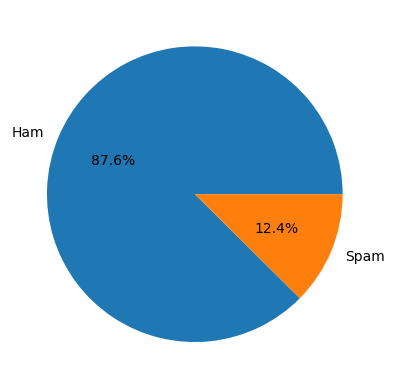

In [195]:
import matplotlib.pyplot as plt

plt.pie(df["Category"].value_counts(), labels=["Ham","Spam"], autopct="%1.1f%%")
plt.show()

In [196]:
#Length of the message
df["no_of_letters"] = df["Message"].apply(len)
df.head()

,Category,Message,no_of_letters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [197]:
#No of words in the message
import spacy

nlp = spacy.load("en_core_web_sm")
df["no_of_words"] = df["Message"].apply(lambda x: len(nlp(x)))
df.head()

,Category,Message,no_of_letters,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [198]:
#No of senntences in the message

df["no_of_sentences"] = df["Message"].apply(lambda x: len(list(nlp(x).sents)))
df.head()

,Category,Message,no_of_letters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [199]:
df.describe()

,Category,no_of_letters,no_of_words,no_of_sentences
count,5157.000000,5157.000000,5157.00000,5157.000000
mean,0.124297,79.104324,18.45065,2.104324
std,0.329952,58.384729,13.29434,1.453966
min,0.000000,2.000000,1.00000,1.000000
25%,0.000000,36.000000,9.00000,1.000000
50%,0.000000,61.000000,15.00000,2.000000
75%,0.000000,118.000000,26.00000,3.000000
max,1.000000,910.000000,196.00000,27.000000


In [200]:
df[df["Category"]==0].describe()

,Category,no_of_letters,no_of_words,no_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869796,17.024801,1.970992
std,0.0,56.710489,13.322087,1.405038
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,2.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,196.000000,27.000000


In [201]:
df[df["Category"]==1].describe()

,Category,no_of_letters,no_of_words,no_of_sentences
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,28.496100,3.043682
std,0.0,30.399707,7.509394,1.447399
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,26.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,33.000000,4.000000
max,1.0,223.000000,49.000000,9.000000


<Axes: xlabel='no_of_letters', ylabel='Count'>

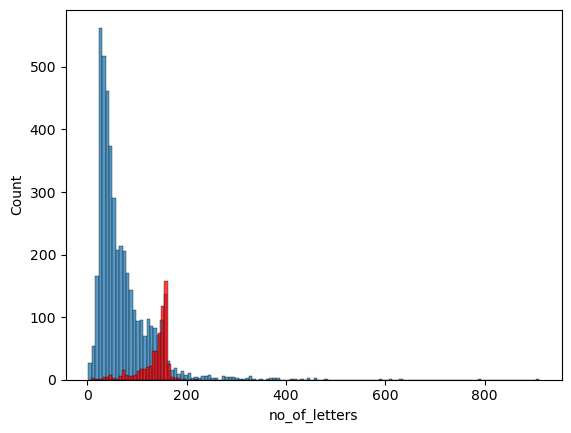

In [202]:
#Plotting histogram to check the distribution of the length of the messages
import seaborn as sns

sns.histplot(df[df["Category"]==0]["no_of_letters"])
sns.histplot(df[df["Category"]==1]["no_of_letters"],color="red")

<Axes: xlabel='no_of_words', ylabel='Count'>

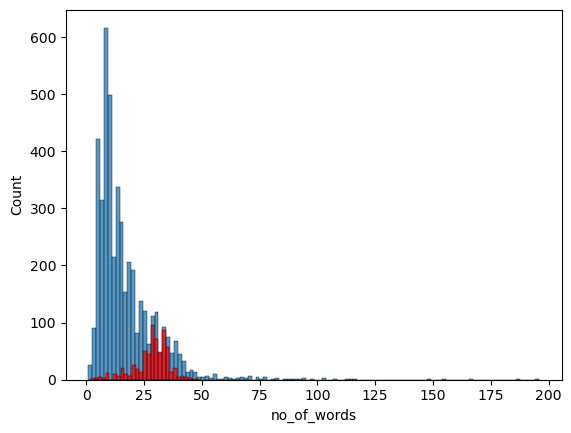

In [203]:
sns.histplot(df[df["Category"]==0]["no_of_words"])
sns.histplot(df[df["Category"]==1]["no_of_words"],color="red")

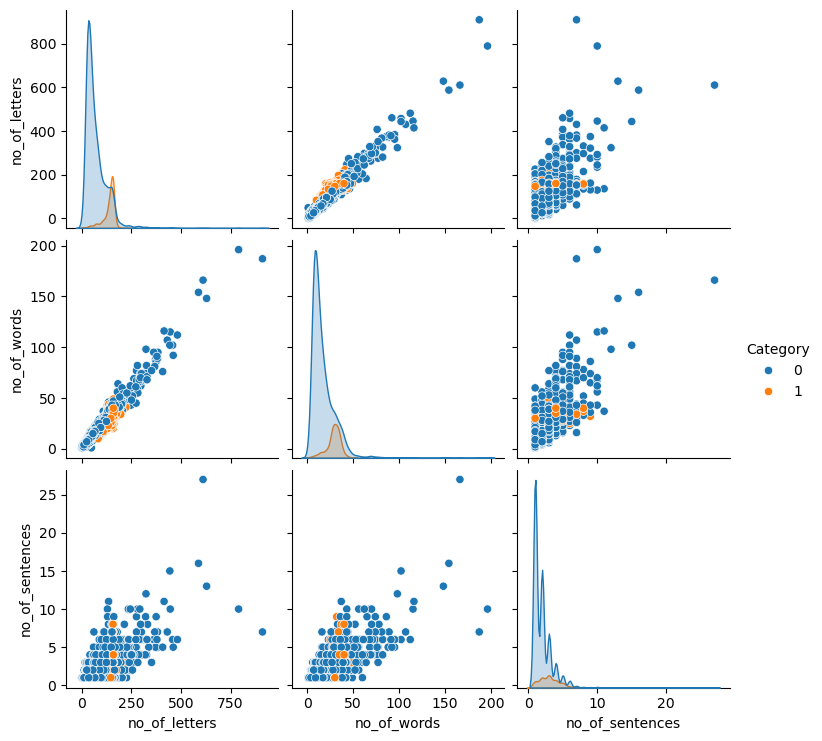

In [204]:
#Plotting the pairplot to check the relationship between the features
sns.pairplot(df,hue="Category")

<Axes: >

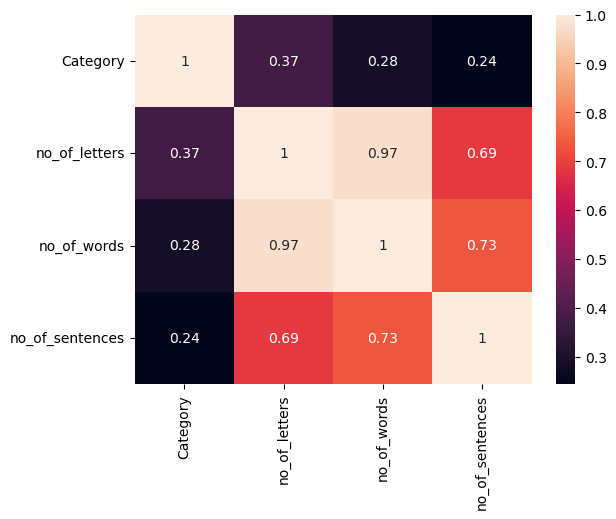

In [205]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True)

Data Preprocessing

In [206]:
def text_transform(text):
    text = text.lower()
    text = nlp(text)
    
    tokens = []
    result = []
    for token in text:
        if token.is_alpha or token.is_digit:
            tokens.append(token)
    
    tokens = [token for token in tokens if not token.is_punct]
    tokens = [token for token in tokens if not token.is_stop]

    for token in tokens:
       result.append(token.lemma_)
    
    result = " ".join(result)
    return result

df["transformed_message"] = df.Message.apply(text_transform)
df.head()

,Category,Message,no_of_letters,no_of_words,no_of_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf live


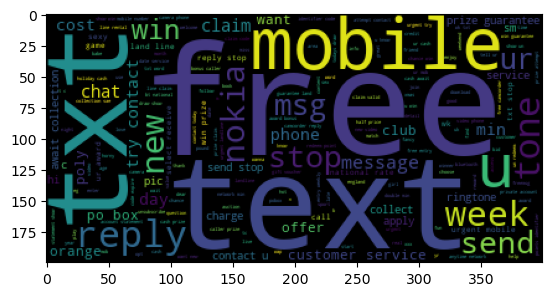

In [207]:
from wordcloud import WordCloud
wc = WordCloud()
spam_df = df[df["Category"] == 1]

wc_spam = wc.generate(spam_df["transformed_message"].str.cat(sep=" "))
plt.imshow(wc_spam)

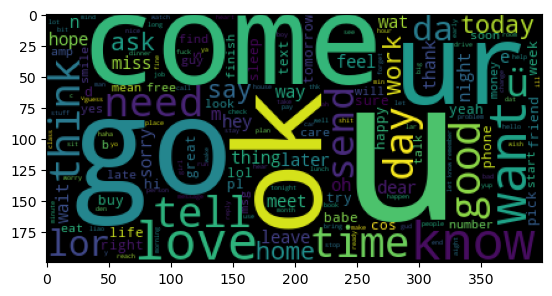

In [208]:
ham_df = df[df["Category"] == 0]

wc_ham = wc.generate(ham_df["transformed_message"].str.cat(sep=" "))
plt.imshow(wc_ham)

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()

X = tfid.fit_transform(df["transformed_message"]).toarray()
y = df["Category"].values

In [210]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy Score : ",accuracy_score(y_test,y_pred))
print(f"Precision Score : ", precision_score(y_test,y_pred))

Accuracy Score :  0.9505813953488372
Precision Score :  0.9871794871794872


In [213]:
import pickle

pickle.dump(tfid,open("tfid.pkl","wb"))
pickle.dump(lr,open("model.pkl","wb"))